# Adam Nathanson (anatha11@jh.edu)
# 12 February 2020

# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [61]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

In [62]:
n = 64
x = np.linspace(0,1,n)+np.random.rand(4,n)
x = np.vstack([x,np.ones(len(x.T))]).T
y = np.linspace(0,1,n)+np.random.rand(n) - 1

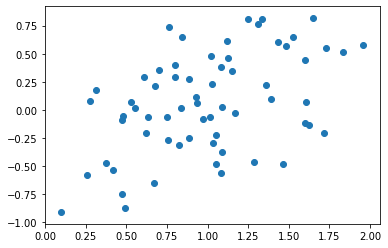

In [63]:
plt.scatter(x.T[0],y)

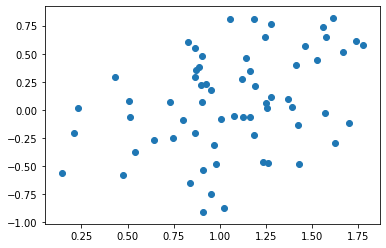

In [64]:
plt.scatter(x.T[1],y)

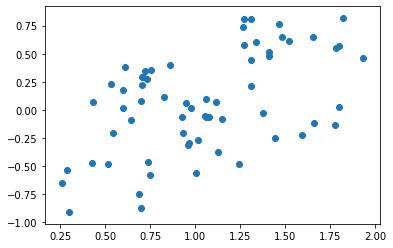

In [65]:
plt.scatter(x.T[2],y)

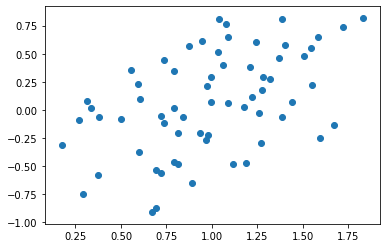

In [66]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

# $\beta = (X^T X)^(-1) Y^T X$

In [67]:
left = np.linalg.inv(np.dot(x.T,x))
right = np.dot(y.T,x)

In [68]:
beta = np.dot(left,right)
beta

array([ 0.16002708,  0.04561346,  0.27946661,  0.31466107, -0.74557841])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

In [69]:
predicted_y = np.dot(x, beta)

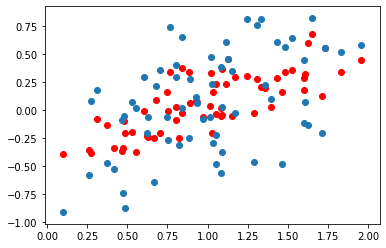

In [70]:
plt.scatter(x.T[0],predicted_y, c='red')
plt.scatter(x.T[0],y)

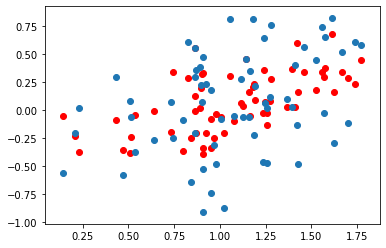

In [71]:
plt.scatter(x.T[1],predicted_y, c='red')
plt.scatter(x.T[1],y)

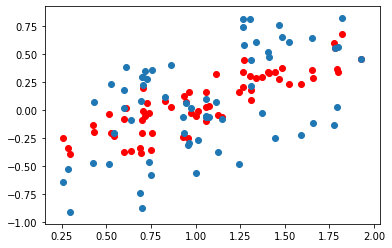

In [72]:
plt.scatter(x.T[2],predicted_y, c='red')
plt.scatter(x.T[2],y)

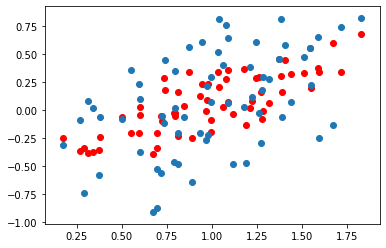

In [73]:
plt.scatter(x.T[3],predicted_y, c='red')
plt.scatter(x.T[3],y)

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [74]:
import pandas as pd

In [75]:
credit = pd.read_csv('C:/Users/atoze/Documents/JHU Govt Analytics/Spring 2020/Machine Learning and Neural Networks/Credit.csv')

In [76]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [77]:
columns = ['Income', 'Limit','Age','Education','Balance']
X_credit = credit[columns].values

X_credit = np.vstack([X_credit.T, np.ones(len(X_credit))]).T
X_credit

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 1.10000e+01, 3.33000e+02,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 1.50000e+01, 9.03000e+02,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 1.10000e+01, 5.80000e+02,
        1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.20000e+01, 1.38000e+02,
        1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 1.30000e+01, 0.00000e+00,
        1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 7.00000e+00, 9.66000e+02,
        1.00000e+00]])

In [78]:
y_credit = credit['Rating']
y_credit

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [79]:
left_credit = np.linalg.inv(np.dot(X_credit.T, X_credit))
right_credit = np.dot(y_credit.T, X_credit)
beta_credit = np.dot(left_credit,right_credit)
beta_credit

array([ 1.32064098e-01,  6.25891484e-02,  3.25811876e-02, -3.44829447e-01,
        1.51557697e-02,  4.75140526e+01])

In [80]:
# The regression model to predict an individual's credit rating, based on the least squares error method, is as follows:
# 
# rating = 0.13*(income) + 0.06*(credit limit) + 0.03*(age) - 0.34*(education) + 0.02*(balance) + 47.51

predicted_credit = np.dot(X_credit,beta_credit)

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

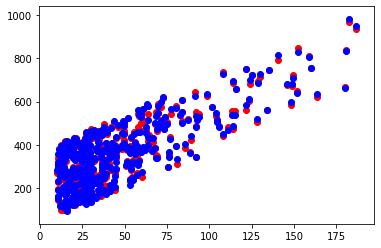

In [81]:
# income vs predicted & actual credit rating
plt.scatter(X_credit.T[0],predicted_credit, c='red')
plt.scatter(X_credit.T[0],y_credit, c='blue')

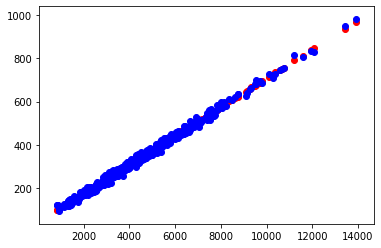

In [82]:
# credit limit vs predicted & actual credit rating 
# (this appears to confirm that credit limit is derived from credit rating, vice a useful determinant of ratings)
plt.scatter(X_credit.T[1],predicted_credit, c='red')
plt.scatter(X_credit.T[1],y_credit, c='blue')

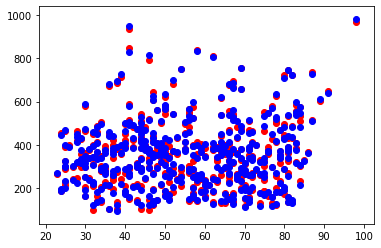

In [83]:
# age vs predicted & actual credit rating
plt.scatter(X_credit.T[2],predicted_credit, c='red')
plt.scatter(X_credit.T[2],y_credit, c='blue')

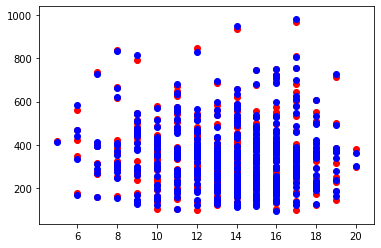

In [84]:
# education vs predicted & actual credit rating
plt.scatter(X_credit.T[3],predicted_credit, c='red')
plt.scatter(X_credit.T[3],y_credit, c='blue')

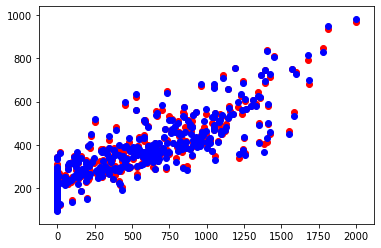

In [85]:
# balance vs predicted & actual credit rating
plt.scatter(X_credit.T[4],predicted_credit, c='red')
plt.scatter(X_credit.T[4],y_credit, c='blue')

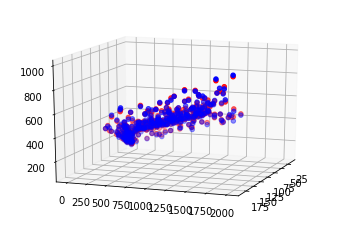

In [86]:
# income vs balance vs predicted & actual credit rating

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, 20)
ax.scatter(X_credit.T[0], X_credit.T[4], predicted_credit, zdir='z', c='r')
ax.scatter(X_credit.T[0], X_credit.T[4], y_credit, zdir='z', c='b')